In [59]:
#
from obspy.taup import TauPyModel
from numpy import zeros, int8

model = TauPyModel("iasp91")

xs = range(95,166,5)
dds = range(0,620,5)

rbin = zeros(len(xs)*len(dds)).reshape(len(xs),len(dds))


In [60]:
for ii,xdist in enumerate(xs):
    tmp0 = model.get_travel_times(0,xdist/2.,["S"])
    print(xdist)
    for jj,ddepth in enumerate(dds):
        tmp1 = model.get_travel_times(ddepth,xdist/2.,["S"])
        time = tmp1[0].time*2. - tmp0[0].time*2.
        if time > 0.0:
            print('error')
        else:
            rbin[ii,jj] = time

95
100
105
110
115
120
125
130
135
140
145
150
155
160
165


In [61]:
rbin

array([[   0.        ,   -2.68698835,   -5.37358655, ..., -199.45474411,
        -200.6612946 , -201.86185388],
       [   0.        ,   -2.69805179,   -5.39573821, ..., -201.8937198 ,
        -203.12855614, -204.35755997],
       [   0.        ,   -2.70923208,   -5.41811731, ..., -204.29717691,
        -205.55925432, -206.81562927],
       ..., 
       [   0.        ,   -2.8122023 ,   -5.62420994, ..., -225.60803722,
        -227.10515554, -228.59766527],
       [   0.        ,   -2.82168754,   -5.64318216, ..., -227.50999732,
        -229.02759255, -230.54066269],
       [   0.        ,   -2.83108086,   -5.66198257, ..., -229.38517524,
        -230.92286096, -232.45610088]])

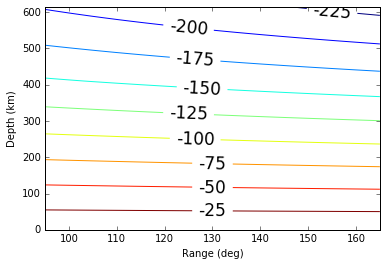

In [62]:
%matplotlib inline
from matplotlib import pylab as plt

CS4 = plt.contour(xs, dds, rbin.T, 10, aspect='auto')
plt.clabel(CS4, fmt='%2d', colors='k', fontsize=17)
_,_ = plt.ylabel('Depth (km)'), plt.xlabel('Range (deg)')

In [63]:
from scipy.interpolate import interp2d

x,y,z = [],[],[]
for ii,xdist in enumerate(xs):
    for jj,ddepth in enumerate(dds):
        x.append(xdist)
        y.append(ddepth)
        z.append((rbin[ii,jj]))
        
f = interp2d(x, y, z, kind='cubic')

/Users/mancinelli/anaconda/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=22,51 m=1860 fp=0.000011 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<a list of 14 text.Text objects>

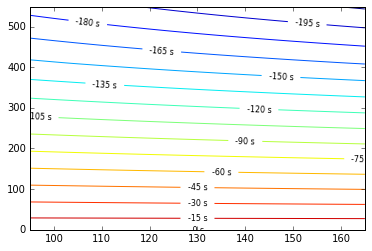

In [64]:
times = range(0,550)

wbin = zeros(len(xs)*len(times)).reshape(len(xs),len(times))

for ii,xdist in enumerate(xs):
    for jj,time in enumerate(times):
        wbin[ii,jj] = f(xdist,time)
        
CS = plt.contour(xs, times, wbin.T, 15, aspect='auto')
plt.clabel(CS, fmt='%2d s', colors='k', fontsize=8)

In [65]:
import pickle
file=open('migrator.pickle','wb')
pickle.dump(f, file)
file.close()